# LVIT Test

In [1]:
#Only run this cell on the first time using a new System.
pip install pyserial


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Instructions

## Before Using this Program
#### First trial after connecting LVIT: "Test_VMeasurement"
Upload the Arduino file "Test_VMeasurement.ino" on the Arduino software. Wait to see if data is recorded, then Close out the program.
    Subsequent trials can ignore this step.

#### First trial of each day: "LVIT Calibration Test"
Use python file "LVIT Calibration Test". Replace the port name with the port the LVIT is attached to. Replace the heights with the values of the calibration blocks. Run the program and place the corresponding block when prompted. Shut down the Kernel.  

## Main Recording Program: "LVIT Test"
Use python file "LVIT Test". Replace the port name with the port the LVIT is attached to. Input y-intercept and slope from Calibration Test. Replace minutes with how many minutes will be used. 

In [2]:
import serial
import time
from datetime import datetime
import pdb
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [3]:
def closest_value(input_list, input_value):
 
  arr = np.asarray(input_list)
 
  i = (np.abs(arr - input_value)).argmin()
 
  return arr[i]

## Calibration

In [4]:
#Set Port for LVIT
serialPortName = '/dev/cu.usbmodem1201'
serialPort = serial.Serial(
    port=serialPortName, baudrate=9600, bytesize=8, timeout=2, stopbits=serial.STOPBITS_ONE
)

#Calibration Data
y_int = .34
slope = .14

In [5]:
#Set List of Brands
brand_list = ['A', 'E', 'P', 'K', 'C','D']

# Ask for the brand
brand = input("Which brand is it from the list (A, E, P, K, C, D)? ").upper()
if brand in map(str.upper, brand_list):
    print('In List')
    
    #Ask for which expirement run?
    #experiment = input("What number setup is this? (#)")
    experiment = 39

    # Ask for the run number
    run_number = input("What is the run number? ")
    
    #Create a reference for later calculation
    initial_mass = input("Input Initial Mass of the Full Test Cell+SAP:")

    #Create Filenames
    filename = f"{brand}{experiment}_{run_number}.csv"
    full_filename = f"{brand}{experiment}_{run_number}_original.csv"
    
    print(filename)
    print(full_filename)

    
else:
    print("Not in list")

Which brand is it from the list (A, E, P, K, C)? k
In List
What is the run number? 3
K2_3.csv
K2_3_original.csv


## Main Testing Loop

In [6]:
serialString = ""  # Used to hold data coming over UART

# Get timestamps for the file name and Loop
time_start = time.time()
now = datetime.now()
current_time = now.strftime("%m-%d-%y_%H-%M-%S")

time_last_log = time.time()
time_now = time.time()
time_elapsed = time_now - time_start

# Open output data file
output_filename = f"{brand}{experiment}_{run_number}_Scale_Output_Data_{current_time}.csv"
#output_filename = 'Test1'
f = open(output_filename, "w")
#LVIT Run Time
minutes = 30
duration = 60 * minutes



# Main Loop
while time_elapsed < duration + 1:
  
  time_now = time.time()
  time_elapsed = time_now - time_start

  # Wait until there is data waiting in the serial buffer
  if serialPort.in_waiting > 0:

    # Read data out of the buffer until a carraige return / new line is found
    serialString = serialPort.readline(16)
    serial_output = serialString.decode("Ascii")

    # it's time to log another weight value.
    time_since_last_log = time_now - time_last_log

    if time_since_last_log >= .995:
      # Reformat output from '  -23.8g\n' to '-23.8'
      weight = serial_output
      
      weight = weight.replace("g\n", "")
      
      
      # Print the contents of the serial data to the file
      try:
        output = "{0},{1}\n".format(round(time_elapsed, 3), weight)
        print(output)
        weight = weight.replace("Voltage: ","")
        output = output.replace("Voltage: ","")
        output = output.replace("V","")
        f.write(output)
      except:
        pass
      time_last_log = time_now
    
   

f.close()

final_mass = input("Input Final Mass of the Full Test Cell+SAP:")

1.018,3.69501


2.034,4.37928


3.05,4.30108


4.066,4.24242


5.077,3.66569


6.093,3.28446


7.109,3.44086


8.125,5.62072


9.14,6.79374


10.152,7.72238


11.168,7.83969


12.184,7.84946


13.199,7.83969


14.215,7.82014


15.227,7.80059


16.243,7.79081


17.258,7.78104


18.274,7.77126


19.29,7.75171


20.302,7.73216


21.317,7.71261


22.333,7.70283


23.349,7.69306


24.365,7.69306


25.376,7.67351


26.392,7.65396


27.408,7.62463


28.424,7.63441


29.439,7.62463


30.451,7.61486


31.467,7.60508


32.483,7.59531


33.498,7.58553


34.514,7.56598


35.526,7.55621


36.542,7.54643


37.557,7.54643


38.573,7.54643


39.589,7.51711


40.605,7.51711


41.616,7.49756


42.632,7.48778


43.648,7.47801


44.664,7.47801


45.679,7.48778


46.691,7.46823


47.707,7.45846


48.723,7.45846


49.738,7.43891


50.754,7.41935


51.766,7.40958


52.782,7.40958


53.797,7.39980


54.813,7.39003


55.829,7.37048


56.84,7.37048


57.856,7.35093


58.872,7.35093


59.888,7.35093


60.904,7.3

472.98,6.16813


473.996,6.16813


475.012,6.14858


476.027,6.15836


477.039,6.15836


478.055,6.15836


479.071,6.15836


480.086,6.14858


481.102,6.16813


482.118,6.14858


483.13,6.13881


484.145,6.14858


485.161,6.14858


486.177,6.14858


487.193,6.14858


488.204,6.14858


489.22,6.13881


490.236,6.14858


491.252,6.14858


492.267,6.13881


493.279,6.13881


494.295,6.13881


495.311,6.14858


496.326,6.13881


497.342,6.12903


498.358,6.13881


499.37,6.14858


500.385,6.12903


501.401,6.12903


502.417,6.13881


503.433,6.12903


504.444,6.11926


505.46,6.12903


506.476,6.12903


507.492,6.12903


508.507,6.11926


509.519,6.10948


510.535,6.11926


511.55,6.11926


512.566,6.11926


513.582,6.10948


514.598,6.11926


515.609,6.11926


516.625,6.10948


517.641,6.11926


518.657,6.11926


519.673,6.10948


520.684,6.10948


521.7,6.10948


522.716,6.10948


523.732,6.10948


524.747,6.10948


525.759,6.10948


526.775,6.12903


527.79,6.09971


528.806,6.09971


5

938.831,5.81623


939.846,5.82600


940.862,5.82600


941.878,5.82600


942.89,5.81623


943.905,5.81623


944.921,5.82600


945.937,5.82600


946.953,5.82600


947.964,5.81623


948.98,5.81623


949.996,5.82600


951.012,5.81623


952.027,5.81623


953.039,5.81623


954.055,5.81623


955.071,5.81623


956.086,5.81623


957.102,5.81623


958.118,5.81623


959.13,5.81623


960.145,5.81623


961.161,5.82600


962.177,5.81623


963.193,5.81623


964.204,5.80645


965.22,5.80645


966.236,5.79668


967.251,5.81623


968.267,5.81623


969.279,5.81623


970.295,5.81623


971.31,5.81623


972.326,5.81623


973.342,5.80645


974.354,5.81623


975.369,5.81623


976.385,5.78690


977.401,5.80645


978.417,5.80645


979.433,5.80645


980.444,5.81623


981.46,5.81623


982.476,5.80645


983.492,5.79668


984.507,5.80645


985.519,5.79668


986.535,5.80645


987.55,5.81623


988.566,5.81623


989.582,5.80645


990.594,5.80645


991.609,5.80645


992.625,5.81623


993.641,5.80645


994.657,5.80645



1383.344,5.72825


1384.36,5.72825


1385.372,5.72825


1386.388,5.76735


1387.403,5.73802


1388.419,5.72825


1389.435,5.72825


1390.447,5.73802


1391.462,5.72825


1392.478,5.73802


1393.494,5.72825


1394.51,5.73802


1395.521,5.73802


1396.537,5.73802


1397.553,5.72825


1398.569,5.73802


1399.584,5.72825


1400.596,5.73802


1401.612,5.73802


1402.627,5.73802


1403.643,5.73802


1404.659,5.73802


1405.671,5.72825


1406.686,5.73802


1407.702,5.73802


1408.718,5.73802


1409.734,5.72825


1410.745,5.72825


1411.761,5.72825


1412.777,5.73802


1413.793,5.73802


1414.808,5.73802


1415.821,5.73802


1416.836,5.72825


1417.851,5.72825


1418.867,5.72825


1419.883,5.72825


1420.895,5.72825


1421.91,5.73802


1422.926,5.72825


1423.942,5.72825


1424.958,5.73802


1425.969,5.72825


1426.985,5.72825


1428.001,5.71847


1429.017,5.71847


1430.032,5.71847


1431.044,5.72825


1432.06,5.72825


1433.076,5.71847


1434.091,5.72825


1435.107,5.71847


1436.119,5.71847

## Data Reading

In [7]:
#Initialize Variables
Time = []
position = []
position_og = []
voltage = []

print(output_filename)

#Use file from Main Loop to set time, voltage, and position lists.
with open(output_filename, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # skip header row
    for row in csv_reader:
        if row == []:
            continue
        if row[0] == '' or row[1] == '' or row == '':
            continue
        Time.append(float(row[0]))
        voltage.append(float(row[1]))
    

    

K2_3_Scale_Output_Data_06-27-23_14-32-49.csv


## Data Manipulation

### Positional Data

In [8]:
#Use slope and y-intercept from Calibration Data to transform Voltage to Position.
position = [(i - y_int)  / slope for i in voltage] #Converts from Voltage to mm
position = [-i + max(position) for i in position] #Flip data to reflect movement of polymer and set zero point.

#Set Lists for the unmanipulated variables.    
position_og = position
time_og = Time

#Subtract initial manual movement.
position = position[position.index(min(position)):]
Time = Time[:len(position)]

displacement = max(position) - min(position)
print('Total Displacement:',displacement, 'mm\n')


Total Displacement: 15.500642857142857 mm



#### Velocity Appx.

In [9]:
#Calculate the change in position and time.
dP = [i - position[0] for i in position[1:]]
dTp = [i - Time[0] for i in Time[1:]]

# Calculate velocity (change in position over change in time)
velocity = [dP[i]/dTp[i]  for i in range(len(dP))]
velocity = [0] + velocity

max_velocity = max(velocity)
print('Max Velocity: ',max_velocity,' mm/s')

Max Velocity:  0.11471292427585526  mm/s


### Mass Data

In [10]:
#Develop Area to use in approximating volume.
radius = 30 #in cm
area = np.pi*radius**2

#Use area and positional data to create mass data.
mass_og = [area*i*0.001 for i in position_og]
mass_calc = [area*i*0.001 for i in position]
Tm = Time

#Use the measured mass data to fit the calculated mass data from the LVIT.
ratio = (final_mass-initial_mass)/(max(mass_calc)-min(mass_calc))
mass = [ratio*i for i in mass_calc]
absorption = max(mass) - min(mass)
print('Total Absorption:',absorption, 'cc')

Total Absorption: 43.82703515332719 cc


#### Rate Appx.

In [11]:
#Calculate the change in mass and time.
dM = [i - mass[0] for i in mass[1:]]
dTm = [i - Tm[0] for i in Tm[1:]]

# Calculate mass_rate (change in mass over change in time)
mass_rate = [dM[i]/dTm[i]  for i in range(len(dM))]
mass_rate = [0] + mass_rate
TV = Time[:len(mass_rate)]

max_rate = max(mass_rate)
print('Max Mass Change Rate: ',max_rate,' cc/s')

Max Mass Change Rate:  0.3243431521591462  cc/s


#### T-20 appx.

In [12]:
M20 = closest_value(mass,20)
T20 = Time[mass.index(M20)]
print("T-20 = ",T20," , occurs when Mass = ",M20)

T-20 =  132.961  , occurs when Mass =  19.939262213331435


### Noise appx.

In [13]:
P3 = position[1500:]
std_P = np.std(P3)
print(round(std_P,4))

0.0704


# Plots (Position, Velocity, Mass, Mass Rate)

Text(0.5, 1.0, 'CC Rate vs Time')

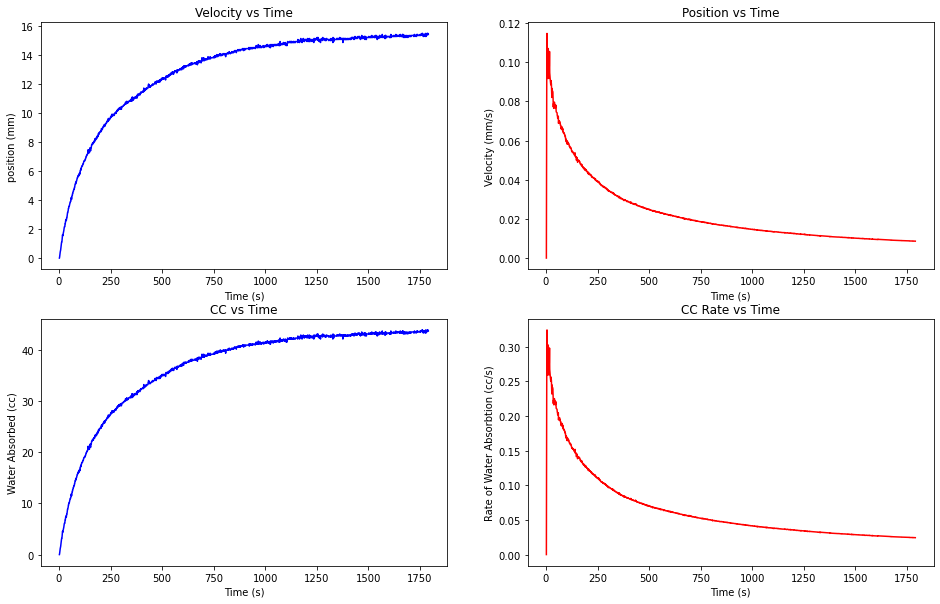

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axs = axs.flatten()

axs[0].plot(Time, position,'b')
axs[1].plot(TV, velocity,'r')
axs[2].plot(Time, mass,'b')
axs[3].plot(TV, mass_rate,'r')

axs[0].set_xlabel('Time (s)')
axs[1].set_xlabel('Time (s)')
axs[2].set_xlabel('Time (s)')
axs[3].set_xlabel('Time (s)')

axs[0].set_ylabel('position (mm)')
axs[1].set_ylabel('Velocity (mm/s)')
axs[2].set_ylabel('Water Absorbed (cc)')
axs[3].set_ylabel('Rate of Water Absorbtion (cc/s)')

axs[1].set_title('Position vs Time')
axs[0].set_title('Velocity vs Time')
axs[2].set_title('CC vs Time')
axs[3].set_title('CC Rate vs Time')


# Save Data

#### File 1: Time, Position, Mass

#### File 2: Full Time, Voltage, Full Position, Full Mass


In [15]:
# Writing data to CSV files

with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(len(Time)):
        writer.writerow([Time[i], position[i], mass[i], mass_calc[i]])

with open(full_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(len(Time)):
        writer.writerow([time_og[i], voltage[i], position_og[i], mass_og[i]])

print(filename,'written')
print(full_filename,'written')


K2_3.csv written
K2_3_original.csv written
